<a href="https://colab.research.google.com/github/Martin09/DeepSEM/blob/master/obj_detection-NW_yield/1_nw_yield_image_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Dataset Peparation for NW Yield
In this notebook we will:
1. Import our raw SEM images.
2. Segment each image into 6 smaller images for easier labelling/training and export images as PNG files.
3. Export images for labelling to a new [Labelbox](https://labelbox.com/) project.

## 1.1 - Download the dataset

In [1]:
# # Optional: Save everything to your own GoogleDrive
# from google.colab import drive
# drive.mount('/content/gdrive/')
# %cd "/content/gdrive/My Drive/path/to/save/location"

# Clone the DeepSEM repository
!rm -rf DeepSEM  # Remove folder if it already exists
!git clone https://github.com/Martin09/DeepSEM

Cloning into 'DeepSEM'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 450 (delta 50), reused 24 (delta 11), pack-reused 358
Receiving objects: 100% (450/450), 107.78 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [2]:
dataset_dir = './DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-rawtiffs'
!rm -rf $dataset_dir  # Remove dataset directory if it already exists
!wget https://github.com/Martin09/DeepSEM/raw/master/obj_detection-NW_yield/datasets/NWs-8kMag-rawtiffs.zip
!unzip NWs-8kMag-rawtiffs.zip -d $dataset_dir
!rm NWs-8kMag-rawtiffs.zip

--2020-06-11 09:23:05--  https://github.com/Martin09/DeepSEM/raw/master/obj_detection-NW_yield/datasets/NWs-8kMag-rawtiffs.zip
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Martin09/DeepSEM/master/obj_detection-NW_yield/datasets/NWs-8kMag-rawtiffs.zip [following]
--2020-06-11 09:23:06--  https://raw.githubusercontent.com/Martin09/DeepSEM/master/obj_detection-NW_yield/datasets/NWs-8kMag-rawtiffs.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7171575 (6.8M) [application/zip]
Saving to: ‘NWs-8kMag-rawtiffs.zip’

NWs-8kMag-rawtiffs. 100%[===================>]   6.84M  34.8MB/s    in 0.2s    

2020

## 1.2 - Segment Images
Here we will import the raw TIFF images and segment them into smaller images to reduce the number of objects per image. From experience, if we use the full-scale images, the ~1000 objects slows down the labelling software significantly. If we divide each image into 6 smaller pieces, we can then have only a few hundred images per image.

The best part is that once we have trained a model on these smaller images, we can then run this model on the full-scale images.

In [0]:
import glob, cv2
from google.colab.patches import cv2_imshow
input_files = glob.glob('./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-rawtiffs/*.tif')

Import a raw TIFF image to see what it looks like.

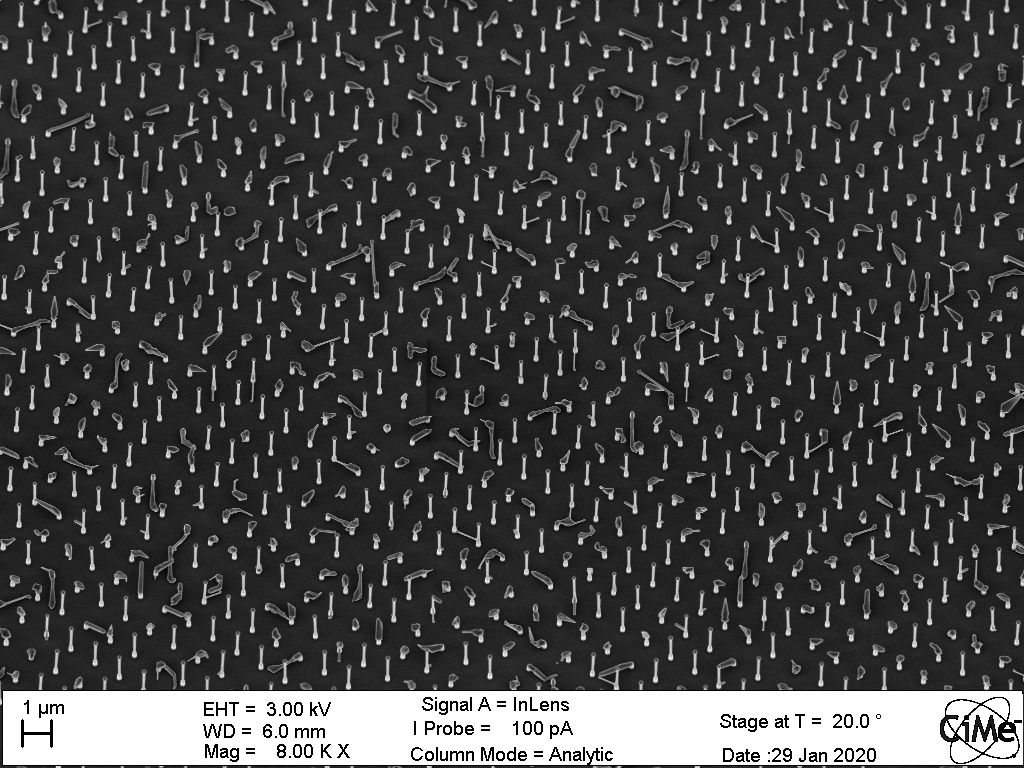

In [4]:
im = cv2.imread(input_files[0], cv2.IMREAD_GRAYSCALE)
cv2_imshow(im)

Loop over all the raw image files, and subdivide each one then save each sub-image as a separate PNG file.

In [0]:
# CAUTION, WE WILL REMOVE EXISTING DATASET FOLDER!
output_directory = './DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/'
!rm -rf $output_directory
!mkdir $output_directory

In [6]:
# Loop over the TIFF files
for file in input_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE) # Import the next image

    # Trim off the overlay bar at bottom of image
    img = img[:688,:]
    
    img_h,img_w = img.shape
    num_div_w = 3
    num_div_h = 2

    new_img_w = int(img_w/num_div_w)
    new_img_h = int(img_h/num_div_h)

    for i in range(num_div_w): # Loop over number of images in x direction
        for j in range (num_div_h): # Loop over number of images in y direction
            x_start = i * new_img_w
            x_end = (i+1) * new_img_w
            y_start = j * new_img_h
            y_end = (j+1) * new_img_h
            # print("x:{} to {}. y: {} to {}.".format(x_start,x_end,y_start,y_end))

            filename = output_directory + file[:-4].split('/')[-1]+'_x{}_y{}.png'.format(i,j)
            print(filename)

            img_cropped = img[y_start:y_end,x_start:x_end] # Crop the image down to the calculated size
            success = cv2.imwrite(filename, (img_cropped).astype('uint8')) # Save divided image as PNG

            if not success:
                print("Error, couldn't write image '{}'. Check if output directory exists!".format(filename))

./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/145nm_11_x0_y0.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/145nm_11_x0_y1.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/145nm_11_x1_y0.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/145nm_11_x1_y1.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/145nm_11_x2_y0.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/145nm_11_x2_y1.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/135nm_07_x0_y0.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/135nm_07_x0_y1.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/135nm_07_x1_y0.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/135nm_07_x1_y1.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/135nm_07_x2_y0.png
./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/135nm_07_x2_y1.png
./DeepSEM/obj_de

Visualize what a cropped image looks like:

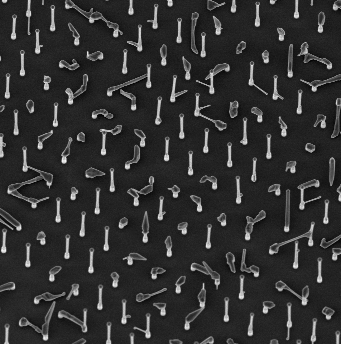

In [7]:
im = cv2.imread('./DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/160nm_13_x2_y1.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(im)

## 1.3 - Labelling

Now we are ready to label these images for training the neural network. There are many tools available for creating labelled datasets. In this tutorial I will be using [Labelbox](https://labelbox.com/) for this purpose. 

Note: for those that don't care about labelling their own dataset, you can skip ahead to [Notebook 2](https://colab.research.google.com/github/Martin09/DeepSEM/blob/master/nanowire_yield/2_nw_yield_training.ipynb) where I will provide the pre-labelled data for the next steps.

Moving on, let's install the labelbox API first:

In [8]:
!pip install labelbox

     |████████████████████████████████| 40kB 3.0MB/s 


If you haven't already done so, go ahead and make a free Labelbox account. You can either upload your images to be labelled manually, or you can upload them directly using this script below. 

***If you want to upload the images from this script, you need to create an API key [here](https://app.labelbox.com/account/api-keys) and paste it below:***

In [0]:
API_KEY = '[INSERT LABELBOX API KEY HERE]'

Now we can make a new Labelbox project and a new dataset before uploading the sub-divided images.

In [10]:
# Change these names if you wish
project_name = 'NW Yield'
dataset_name = 'NWs-8kMag-subdivided'

# Create a new project and dataset in Labelbox
from labelbox import Client
client = Client(API_KEY)
project = client.create_project(name=project_name)
dataset = client.create_dataset(name=dataset_name, projects=project)

AuthenticationError: ignored

In [0]:
# Perform a bulk upload of the subdivided PNG files
dataset_dir = './DeepSEM/obj_detection-NW_yield/datasets/NWs-8kMag-subdivided/'
dataset_files = glob.glob(dataset_dir + '*.png')  # Get a list of the files to upload
dataset.create_data_rows(dataset_files) # Upload the files

After a few minutes, you should see the new project and images appear in your Labelbox account, [here](https://app.labelbox.com/projects). You can now finish setting up your Labelbox project on the website, including setting your object classes.

Then comes the time-consuming part: labelling your data. For this tutorial, we will only be doing bounding box detection. Therefore, be sure to ***only*** define bounding box objects (not segmentation or polygon objects, for example).

[Notebook 2](https://colab.research.google.com/github/Martin09/DeepSEM/blob/master/nanowire_yield/2_nw_yield_training.ipynb) assumes you have finished your labelling and have exported a labelbox .JSON file with all of your bounding box labels. If you don't have your own labelled dataset don't worry, I will provide that for you. See you there!